<a href="https://colab.research.google.com/github/sanujsriv/_topic_models/blob/FoTo/FoTo_Doc_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download pickle from Dropbox (Documents)**

In [ ]:
# Local
# %cd /home/grad16/sakumar/colab/FoTo_All_Docs_Region

In [ ]:
## Short-Text
!wget https://www.dropbox.com/s/trz5uph29b0t0eg/data_crowder.zip

In [ ]:
# !wget https://www.dropbox.com/s/09y9y1h0xk3cxaj/embeddings_twentynews.pkl
# !wget https://www.dropbox.com/s/ewv3vcwgll0r8a7/data_twentynews_labels.pkl
# !wget https://www.dropbox.com/s/chpjn9lzr7rmn2k/fixed_data_twentynews_preprocessed.pkl

In [ ]:
# !wget https://www.dropbox.com/s/8khmuj31il8zgkp/data_reuters_labels.pkl
# !wget https://www.dropbox.com/s/bgc1ht0jsyjed6s/embeddings_reuters.pkl
# !wget https://www.dropbox.com/s/9fk30bjzeefvhgl/data_reuters_preprocessed.pkl

In [ ]:
# !wget https://www.dropbox.com/s/52eoulcm5807npk/data_arxiv_preprocessed.pkl
# !wget https://www.dropbox.com/s/zgjy9575pcj5v67/embeddings_arxiv.pkl
# !wget https://www.dropbox.com/s/xzvshpgvwiy3spz/data_arxiv_labels.pkl

In [ ]:
# !wget https://www.dropbox.com/s/c6wlr148lhwsbaz/embeddings_wos.pkl
# !wget https://www.dropbox.com/s/j96061ln6oeejkf/data_wos_preprocessed.pkl
# !wget https://www.dropbox.com/s/kiffa4nidkjt7wi/data_wos_labels.pkl

In [ ]:
# !wget https://www.dropbox.com/s/wz88fk42r0viqvo/data_webkb_preprocessed.pkl
# !wget https://www.dropbox.com/s/8oi5qactwrar1ad/data_webkb_labels.pkl
# !wget https://www.dropbox.com/s/go7r4h39q6l01d5/embeddings_webkb.pkl

#**Unzip**

In [ ]:
import os

def unzip_crowdgender():
  os.system('unzip data_crowder.zip')

In [ ]:
unzip_crowdgender()

# **Just Run these..**

In [ ]:
#@title Imports
# from sympy.stats import RaisedCosine, density
import torch
import pandas as pd
from IPython.display import display
import re
import gc
from time import time
import numpy as np
import collections
# from utils import get_topwords, plot_fig
# from plsv_vae import PlsvVAE
# import data_preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import sklearn
import re
import string
from numpy import random
# from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import fetch_rcv1
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#@title function : load / save pickle_obj
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
# @title Data Loading functions..

def new_50_twenty_news():
  embeddings = load_obj('50_embeddings_twentynews_docs')
  data_preprocessed = load_obj('50_data_twentynews_preprocessed_docs')
  data_preprocessed_labels = load_obj("50_data_twentynews_labels_docs")
  return data_preprocessed,data_preprocessed_labels,embeddings,new_50_twenty_news.__name__

def new_50_twenty_news_sent():
  embeddings = load_obj('50_embeddings_twentynews_docs')
  data_preprocessed = load_obj('50_data_twentynews_preprocessed_sent')
  data_preprocessed_labels = load_obj("50_data_twentynews_labels_sent")
  doc_sent_id = load_obj('50_doc_id_sent')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,new_50_twenty_news_sent.__name__


def load_20News_50():
  embeddings = load_obj('50_embeddings_load_20news_docs')
  data_preprocessed = load_obj('50_docs_preprocessed')
  data_preprocessed_labels = load_obj("50_docs_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News_50.__name__

def load_20News_50_sentences():
  embeddings = load_obj('50_embeddings_load_20news_docs')
  data_preprocessed = load_obj('50_data_load_20news_sentences_preprocessed')
  data_preprocessed_labels = load_obj("50_data_load_20news_sentences_labels")
  doc_sent_id = load_obj('50_doc_id_sent_load_20news_sentences')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,load_20News_50_sentences.__name__


def load_crowdgender():
  data_preprocessed = load_obj('data_crowdgender_preprocessed')
  data_preprocessed_labels = load_obj("data_crowdgender_labels")
  embeddings = load_obj('embeddings_crowdgender')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_crowdgender.__name__

def load_reuters():
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  embeddings = load_obj('embeddings_reuters')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_reuters.__name__

def load_20News():
  embeddings = load_obj('embeddings_twentynews')
  # data_preprocessed = load_obj('data_twentynews_preprocessed')
  data_preprocessed = load_obj('fixed_data_twentynews_preprocessed')
  data_preprocessed_labels = load_obj("data_twentynews_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News.__name__

def load_20News_sentences():
  embeddings = load_obj('embeddings_twentynews_sent')
  data_preprocessed = load_obj('data_twentynews_preprocessed_sent')
  data_preprocessed_labels = load_obj("data_twentynews_labels_sent")
  doc_sent_id = load_obj('doc_id_sent_twentynews')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,load_20News_sentences.__name__

def load_20News_reuters():
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  embeddings = load_obj('embeddings_reuters')
  data_preprocessed.extend(load_obj('data_20News_preprocessed'))
  data_preprocessed_labels.extend(load_obj("data_20news_preprocessed_labels"))
  embeddings.update(load_obj('embeddings_20news'))
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News_reuters.__name__

def load_r52():
  data_preprocessed = load_obj('data_r52_preprocessed')
  data_preprocessed_labels = load_obj("data_r52_labels")
  embeddings = load_obj('embeddings_r52')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_r52.__name__

def load_WebKb():
  data_preprocessed = load_obj('data_webkb_preprocessed')
  data_preprocessed_labels = load_obj("data_webkb_labels")
  embeddings = load_obj('embeddings_webkb')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WebKb.__name__

def load_WoS():
  data_preprocessed = load_obj('data_wos_preprocessed')
  data_preprocessed_labels = load_obj("data_wos_labels")
  embeddings = load_obj('embeddings_wos')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WoS.__name__
def load_arXiv():
  data_preprocessed = load_obj('data_arxiv_preprocessed')
  data_preprocessed_labels = load_obj("data_arxiv_labels")
  embeddings = load_obj('embeddings_arxiv')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_arXiv.__name__

In [ ]:
#@title get_keywords
def get_keywords():
  keywords = []
  keywords_arxiv = ['molecular ','stimulation','liquid','fluid']

  keywords_webkb = ['class','student','department','year']
  # keywords_r52 = ['mutual','fund','market','money']

  keywords_WoS = ['pediatric','protein','clone']
  # keywords_20News_Reuters = ['oil','price','opec','bpd','barrel','saudi','production','mln','crude']

  # keywords_reuters = ['company', 'analyst', 'offer', 'pct', 'takeover', 'merger', 'record', 'dividend', 'pay', 'stock']
  # keywords_reuters = ['stock', 'dividend', 'inc']
  # keywords_reuters = ['company', 'stock', 'pct']
  keywords_reuters = ['oil','crude','ship']


  keywords_20News = ['sport', 'baseball', 'game','match']
  # keywords_20News = ['looking' ,'add', 'voice' ,'input', 'capability', 'user', 'interface']

  keywords_crowdgender = ['housewife','girl','beautiful','blonde']

  keywords = keywords_crowdgender

  return keywords

In [ ]:
#@title ## DESM Score ##
def cosine_similarity_desm_docs(query_list, train_vec, vocab, embeddings):
  num_docs = len(train_vec)
  num_voc = len(vocab)
  sim_list = torch.zeros(num_docs)
  index = 0
  id_vocab = dict(map(reversed, vocab.items()))
  for d in range(num_docs):
    if(d%5000==0): print(d)
    doc_bar = torch.zeros(300)
    doc_length = 0
    for v in range(num_voc):
      # print(type(train_vec[d][v]))
      if(train_vec[d][v] > 0):
        doc_bar.add_(train_vec[d][v] * torch.from_numpy(embeddings[id_vocab[v]])/torch.norm(torch.from_numpy(embeddings[id_vocab[v]])))
        doc_length = doc_length + train_vec[d][v]
    doc_bar = doc_bar / doc_length
    sum = 0

    for q in query_list:
      sum += torch.dot(torch.from_numpy(embeddings[q]) , doc_bar)/(torch.norm(torch.from_numpy(embeddings[q]))*torch.norm(doc_bar))
    sum = sum/len(query_list)
    sim_list[index]=sum
    index = index + 1

  return sim_list

# **Loading Data & Model Hyperparameter**

In [ ]:
# ##### Data loading #####
loaded_data = load_crowdgender()
##########################
data_preprocessed , data_preprocessed_labels , embeddings, name = loaded_data
print(name,len(data_preprocessed_labels),len(data_preprocessed),len(embeddings))

load_crowdgender 19804 19804 15369


#

In [ ]:
# preprossed_data = data_preprocessed
# train_label = data_preprocessed_labels
# vectorizer = CountVectorizer()
# train_vec = vectorizer.fit_transform(preprossed_data).toarray()
# vocab = vectorizer.vocabulary_
# nonzeros_indexes = np.where(train_vec.any(1))[0]
# train_vec_non_zeros = [train_vec[i] for i in nonzeros_indexes]
# preprossed_data_non_zeros = [preprossed_data[i] for i in nonzeros_indexes]
# train_label = [data_preprocessed_labels[i] for i in nonzeros_indexes]

In [ ]:
# !zip data_crowder.zip *.pkl
# from google.colab import files
# files.download("data_crowder.zip")

In [ ]:
vocab  =load_obj('vocab')
preprossed_data_non_zeros = load_obj('preprossed_data_non_zeros')
train_vec_non_zeros = load_obj('train_vec_non_zeros')
keywords  = get_keywords()
# all_rscores = cosine_similarity_desm_docs(keywords,train_vec_non_zeros,vocab, embeddings) # run if query change
all_rscores= load_obj('all_rscores')

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tensor_train_w = torch.tensor(np.asanyarray(train_vec_non_zeros)).float()
train_label = np.asanyarray(load_obj('train_label'))
id_vocab = dict(map(reversed, vocab.items()))

num_coordinate = 2
bs = 256
en1_units_x = 100
en2_units_x = 100
num_input = train_vec_non_zeros[0].shape[0]
variance_x = 1
learning_rate = 0.002
beta1 = 0.99
beta2 = 0.999
drop_rate = 0.6
num_topic = 20
gc.collect()

0

In [ ]:
def get_mem_size(a):
  return 'Mem Size: '+str(a.element_size()*a.nelement() /(1024**3))+' GB'

In [ ]:
#@title All variables occupying memory
import sys
local_vars = list(locals().items())
for var, obj in local_vars:
    print(var, sys.getsizeof(obj))

__name__ 57
__doc__ 113
__package__ 16
__loader__ 16
__spec__ 16
__builtin__ 80
__builtins__ 80
_ih 264
_oh 240
_dh 72
_sh 80
In 264
Out 240
get_ipython 64
exit 56
quit 56
_ 24
__ 53
___ 53
_i 143
_ii 511
_iii 372
_i1 110
_i2 127
_exit_code 24
_i3 290
_i4 275
_i5 269
_i6 263
_i7 269
_i8 123
os 80
unzip_crowdgender 136
_i9 68
_i10 873
torch 80
pd 80
display 136
re 80
gc 80
time 72
np 80
collections 80
CountVectorizer 1056
stopwords 56
sklearn 80
string 80
random 80
WordNetLemmatizer 1056
word_tokenize 136
fetch_20newsgroups 136
fetch_rcv1 136
TfidfVectorizer 1056
_i11 318
pickle 80
save_obj 136
load_obj 136
_i12 4296
new_50_twenty_news 136
new_50_twenty_news_sent 136
load_20News_50 136
load_20News_50_sentences 136
load_crowdgender 136
load_reuters 136
load_20News 136
load_20News_sentences 136
load_20News_reuters 136
load_r52 136
load_WebKb 136
load_WoS 136
load_arXiv 136
_i13 984
get_keywords 136
_i14 986
cosine_similarity_desm_docs 136
_i15 294
loaded_data 80
data_preprocessed 171112
d

In [ ]:
#@title Variables occupying large amt of mem
import sys
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                    embeddings: 576.1 KiB
                         vocab: 576.1 KiB
                      id_vocab: 576.1 KiB
                   train_label: 541.6 KiB
             data_preprocessed: 167.1 KiB
      data_preprocessed_labels: 167.1 KiB
     preprossed_data_non_zeros: 167.1 KiB
           train_vec_non_zeros: 167.1 KiB
                          _i12:  4.2 KiB
                    local_vars:  1.1 KiB


# **Irrelevant Score**

In [ ]:
# torch.max(all_rscores)
top_10_docs=[]
sort,indices = torch.sort(all_rscores,descending=True)
print('Keywords',get_keywords())
print('Descending :',sort,'\n','indices:',indices)
print('\n\n Top 10 Relevant Documents (DESM):\n\n',"---"*40)

for k in range(10):
   print(k+1,') ',preprossed_data_non_zeros[indices[k].item()])
   print(k+1,')',train_label[indices[k].item()])
with open("1000.txt", "w") as output:
  for k in range(0,1000):
    output.write(str(k+1)+') '+str(preprossed_data_non_zeros[indices[k].item()])+'\n')
    output.write(str(k+1)+') '+str(sort[k].item())+'\n')
    output.write(str(k+1)+'label) '+str(train_label[indices[k].item()])+'\n\n')
    # print()

output.close()

Keywords ['housewife', 'girl', 'beautiful', 'blonde']
Descending : tensor([ 0.5789,  0.5721,  0.5721,  ..., -0.0401, -0.0422, -0.0427]) 
 indices: tensor([ 3410, 18680, 16444,  ...,  1202, 13706, 13368])


 Top 10 Relevant Documents (DESM):

 ------------------------------------------------------------------------------------------------------------------------
1 )  cute girl
1 ) female
2 )  girl
2 ) female
3 )  girl
3 ) male
4 )  girl
4 ) brand
5 )  girl girl
5 ) unknown
6 )  gaping beautiful sexy woman
6 ) brand
7 )  beautiful girl earth
7 ) female
8 )  blonde goddess
8 ) unknown
9 )  beautiful person good singer beautiful cute
9 ) male
10 )  shout girl hotline bling skimpy outfit girl fun friend honey
10 ) female


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
num_div = 10
scaler = MinMaxScaler(feature_range=(0+1e-10, 0.99))
normalized_all_rscores = scaler.fit_transform(all_rscores.data.reshape(-1,1))
normalized_all_rscores=torch.tensor(normalized_all_rscores.flatten())

(array([ 121., 1494., 5336., 5946., 4237., 1807.,  598.,  210.,   46.,
           9.]),
 array([9.99999944e-11, 9.90000001e-02, 1.98000000e-01, 2.97000000e-01,
        3.96000000e-01, 4.95000000e-01, 5.94000000e-01, 6.93000000e-01,
        7.92000000e-01, 8.91000000e-01, 9.90000000e-01]),
 <a list of 10 Patch objects>)

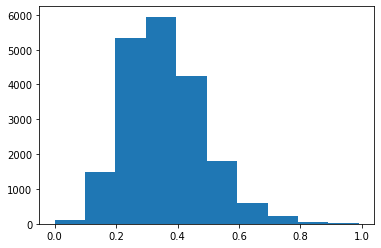

In [ ]:
plt.hist(normalized_all_rscores)

In [ ]:
## Short-Text
def shortTextScore(score,preprossed_data_non_zeros):
  for i in range(len(score)):
  #   if (train_label[i] == 'sci.crypt' or train_label[i] == 'rec.sport.hockey' or train_label[i] == 'sci.med'):
      for k in get_keywords():
        if (k in preprossed_data_non_zeros[i]):
          score[i] = 1.0
  return score

In [ ]:
def getCount_rscore(score,val=1.0):
  s,i = score.sort()
  c=0
  for a in s:
    if a == val:
      c = c+1
  return c

In [ ]:
rscore = shortTextScore(normalized_all_rscores,preprossed_data_non_zeros)
getCount_rscore(rscore,1.0)

406

In [ ]:
irrelevant_scores = torch.round((1-rscore)*(num_div))/(num_div)

(array([4.060e+02, 1.000e+00, 2.470e+02, 0.000e+00, 8.390e+02, 8.160e+03,
        5.473e+03, 0.000e+00, 4.156e+03, 5.220e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

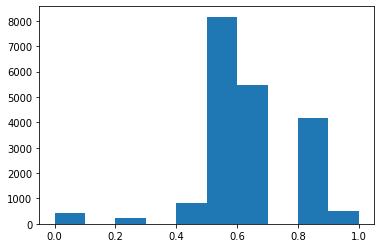

In [ ]:
plt.hist(irrelevant_scores)

# **Document Model**


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import Parameter
torch.cuda.empty_cache()

mu_div=200.0
smoothen=1e-20
sig=10.0

pi = 3.1415927410125732

def gaussian_dist(x,mu,variance):
  exp_term = torch.exp( -0.5 * ((x-mu)/variance)**2 )
  var_term = (1.0 / (variance * (2*pi)**0.5)) + smoothen
  ret = torch.mul(var_term,exp_term)
  ret = torch.log(ret)
  return ret

def torch_lgamma(a):
  return torch.lgamma(torch.tensor(a))

def NewBeta_dist(x,mu,phi_beta,smoothen):
  First = torch_lgamma(phi_beta+smoothen) - (torch_lgamma(phi_beta * mu+smoothen) + torch_lgamma(phi_beta * (1-mu)+smoothen))
  Second_1 = (mu*phi_beta-1) * torch.log(x+smoothen)
  Second_2 = ( (1-mu)*phi_beta-1 )* torch.log(1-x+smoothen)
  Second = Second_1 + Second_2
  return First + Second

def LogL_NewBeta(phi_1,score):
  phi_1_norm = torch.norm(phi_1,dim=-1)
  mu = torch.exp(-0.5 * (torch.pow(phi_1_norm,2))/mu_div)
  # LogL = torch.log(NewBeta_dist(relevant_scores,mu,sig,smoothen)+smoothen)
  LogL = NewBeta_dist(score,mu,sig,smoothen)
  return LogL.sum()

#phi
def gaussian(alpha): return -0.5*alpha
def inverse_multi_quadric(alpha): return -0.5*torch.log(torch.ones_like(alpha) + alpha)
def inverse_quadratic(alpha): return -torch.log(torch.ones_like(alpha) + alpha)

class FoTo_Doc(nn.Module):
    def __init__(self, num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs, distance="gaussian"):
        super(FoTo_Doc, self).__init__()
        self.num_input, self.num_coordinate, self.num_topic, self.variance_x, self.bs\
            = num_input, num_coordinate, num_topic, variance_x, bs

        # encoder
        self.en1_fc     = nn.Linear(num_input, en1_units_x)           # V -> 100 #nxV->(vxh1)->nxh1;
        self.en2_fc     = nn.Linear(en1_units_x, en2_units_x)         # 100  -> 100
        self.en2_drop   = nn.Dropout(drop_rate)                       # 0.6
        self.mean_fc    = nn.Linear(en2_units_x, num_coordinate)      # 100  -> 2
        self.mean_bn    = nn.BatchNorm1d(num_coordinate)              # bn for mean
        self.logvar_fc  = nn.Linear(en2_units_x, num_coordinate)      # 100  -> 2
        self.logvar_bn  = nn.BatchNorm1d(num_coordinate)              # bn for logvar

        # RBF
        self.in_features = self.num_coordinate
        self.out_features = self.num_topic
        self.centres = nn.Parameter(torch.Tensor(self.out_features, self.in_features))
        self.query_center = nn.Parameter(torch.zeros(2,1))

        if distance=="gaussian": self.basis_func = gaussian
        if distance=="inverse_quadratic": self.basis_func = inverse_quadratic
        if distance=="inverse_multi_quadric": self.basis_func = inverse_multi_quadric
        self.init_parameters()

        # decoder layer
        self.decoder    = nn.Linear(self.num_topic, self.num_input)  #T X V
        self.decoder_bn = nn.BatchNorm1d(self.num_topic)

        # decoder document
        self.decoder_phi_bn = nn.BatchNorm1d(num_coordinate)
        self.decoder_x_bn = nn.BatchNorm1d(num_coordinate)

        # prior mean and variance as constant buffers
        prior_mean   = torch.Tensor(1, num_coordinate).fill_(0)
        prior_var    = torch.Tensor(1, num_coordinate).fill_(variance_x)
        self.prior_mean = nn.Parameter(prior_mean, requires_grad=False)
        self.prior_var  = nn.Parameter(prior_var, requires_grad=False)
        self.prior_logvar = nn.Parameter(prior_var.log(), requires_grad=False)


    def init_parameters(self):
        nn.init.normal_(self.centres, 0, 0.01)

    def encode(self, input_):
        N, *_ = input_.size()
        en1 = F.softplus(self.en1_fc(input_))                           # en1_fc   output
        en2 = F.softplus(self.en2_fc(en1))                              # encoder2 output
        en2 = self.en2_drop(en2)

        posterior_mean   = self.mean_bn  (self.mean_fc  (en2))          # posterior mean
        posterior_logvar = self.logvar_bn(self.logvar_fc(en2))          # posterior log variance
        posterior_var    = posterior_logvar.exp()

        return en2, posterior_mean, posterior_logvar, posterior_var

    def take_sample(self, input_, posterior_mean, posterior_var, prior_var):
        eps = input_.data.new().resize_as_(posterior_mean.data).normal_(std=1) # noise
        z = posterior_mean + posterior_var.sqrt() * eps                   # reparameterization

        return z

    def decode(self, z):
        # decode
        N, *_ = z.size()
        zx = self.decoder_x_bn(z).view(N, 1, self.num_coordinate) # Nx1xX
        size = (N, self.out_features, self.in_features) # NxTx2
        x = zx.expand(size)
        c = self.decoder_phi_bn(self.centres).unsqueeze(0).expand(size)
        d = (x-c).pow(2).sum(-1)
        distances = self.basis_func(d) #NxT
        zx_phi = torch.exp(distances - torch.logsumexp(distances, dim=-1, keepdim=True))
        recon_v = torch.mm(zx_phi, F.softmax(self.decoder_bn(self.decoder.weight).transpose(1,0), dim=-1))
        return recon_v, zx, zx_phi, d, c


    def forward(self, input_, score, compute_loss=False):
        en2, posterior_mean, posterior_logvar, posterior_var = self.encode(input_)
        z = self.take_sample(input_, posterior_mean, posterior_var, self.variance_x)

        # decode
        recon_v, zx, zx_phi,d,c= self.decode(z)

        if compute_loss:
            return recon_v, self.loss(input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, score, zx)
        else:
            return z, recon_v, zx, zx_phi


    def KLD(self, posterior_mean,posterior_logvar,posterior_var):
        N = posterior_mean.shape[0]
        prior_mean   = self.prior_mean.expand_as(posterior_mean)
        prior_var    = self.prior_var.expand_as(posterior_mean)
        prior_logvar = self.prior_logvar.expand_as(posterior_mean)

        var_division    = posterior_var  / prior_var
        diff            = posterior_mean - prior_mean
        diff_term       = diff * diff / prior_var
        logvar_division = prior_logvar - posterior_logvar

        xKLD = 0.5 * ((var_division + diff_term + logvar_division).sum(-1) - self.num_coordinate)
        xKLD_mean = xKLD.mean()
        return xKLD_mean

    def loss(self, input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, score, zx, avg=True):

        N = posterior_mean.shape[0]
        NL_mean = - (input_ * (recon_v+1e-10).log()).sum(-1).mean()
        xKLD_mean = self.KLD(posterior_mean,posterior_logvar,posterior_var)

        # NegativeLogL_RScore = torch.tensor(0.0) # Disable Score (Works like PLSV-VAE)
        phi_1 = torch.narrow(zx_phi,1,0,1)
        NegativeLogL_RScore = - LogL_NewBeta(phi_1,score)
        loss = NL_mean + xKLD_mean + NegativeLogL_RScore

        return loss, NL_mean , xKLD_mean , NegativeLogL_RScore

In [ ]:
model = FoTo_Doc(num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs, "inverse_quadratic")
model.to(device)
optimizer = optim.Adam(model.parameters(), learning_rate, betas=(beta1, beta2))
epochs = 1000

neg_log_rscore_arr=[]
x_arr,recon_arr = [],[]

all_indices = torch.randperm(tensor_train_w.size(0)).split(bs)

for epoch in range(epochs):
    loss_u_epoch = 0.0
    loss_xkl_epoch = 0.0
    recon_ep = 0.0
    loss_epoch = 0.0
    neg_log_rscore_ep = 0.0
    model.train()

    for batch_ndx in all_indices:

        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]
        # r_indexes = relv_indexes[batch_ndx].to(device)
        irr_scores_b = irrelevant_scores[batch_ndx].to(device)
        recon_v, (loss, loss_u, xkl_loss, neg_log_rscore) = model(input_w, irr_scores_b, compute_loss=True)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()             # backpror.step()            # update parameters
        loss_epoch += loss.item()
        loss_u_epoch += loss_u.item()
        loss_xkl_epoch += xkl_loss.item()
        neg_log_rscore_ep += neg_log_rscore.item()
    x_arr.append(loss_xkl_epoch)
    recon_arr.append(loss_u_epoch)
    neg_log_rscore_arr.append(neg_log_rscore_ep)

    if epoch % 10 == 0:
        print('Epoch -> {}, loss->{}'.format(epoch,loss_epoch))
        print('recon_loss==> {} || KLD==> {} || neg_loss = {}'.format(loss_u_epoch, loss_xkl_epoch,neg_log_rscore_ep))
        gc.collect()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch -> 0, loss->449261.43212129385
recon_loss==> 4092.385654449463 || KLD==> 103.65081834793091 || neg_loss = 445065.3956489733
Epoch -> 10, loss->427737.1315440857
recon_loss==> 3624.1808891296387 || KLD==> 9.232499346137047 || neg_loss = 424103.7181567871
Epoch -> 20, loss->407760.2523389232
recon_loss==> 3611.303092956543 || KLD==> 37.07377681136131 || neg_loss = 404111.8754811657
Epoch -> 30, loss->411282.1742007609
recon_loss==> 3596.281295776367 || KLD==> 43.3616738319397 || neg_loss = 407642.5312335368
Epoch -> 40, loss->406305.91394795716
recon_loss==> 3586.835174560547 || KLD==> 46.927308678627014 || neg_loss = 402672.1514738972
Epoch -> 50, loss->406117.38117806055
recon_loss==> 3580.8020973205566 || KLD==> 48.90055072307587 || neg_loss = 402487.67853371246
Epoch -> 60, loss->406816.4371596133
recon_loss==> 3574.4166374206543 || KLD==> 50.74266821146011 || neg_loss = 403191.2778616702
Epoch -> 70, loss->405971.0434108689
recon_loss==> 3567.628593444824 || KLD==> 52.93534606

KeyboardInterrupt: ignored

# **Functions (Plot_loss, get_topwords, get_Z, get_Contour, print_Topics)** - *Run Once*

In [ ]:
#@title get_all_tensor_size
def getall_tensor_size():
  for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
            print(type(obj), obj.size(),get_mem_size(obj))
    except:
        pass

In [ ]:
import plotly.graph_objects as go
def plot_loss(y,name):
  figure = go.Figure()
  figure.add_trace(go.Scatter(x=[i for i in range(1,epochs+1)], y=y,mode='lines',name=name))
  figure.show(renderer='colab')

In [ ]:
def get_topwords(beta, id_vocab):
    topic_indx = 0
    topwords_topic = []
    for i in range(len(beta)):
        topwords_topic.append( str(topic_indx)+": "+ " ".join([id_vocab[j] for j in beta[i].argsort()[:-10 - 1:-1]]))
        topic_indx+=1
    return topwords_topic

In [ ]:
def get_Z(X,Y,query_center):
  norms = torch.zeros(X.shape)
  Z = torch.zeros(X.shape)

  for i in range(X.shape[0]):
    for j in range(X.shape[0]):
      v = torch.tensor([X[i][j],Y[i][j]])

      # norms[i][j] = torch.norm(v)
      # Z[i][j]=torch.exp(-0.5 * (torch.pow(norms[i][j],2))/mu_div)

      norms[i][j] = (v-query_center.T).pow(2).sum(-1)
      Z[i][j]=torch.exp(-0.5 * norms[i][j]/mu_div)
  return Z

In [ ]:
def get_Contour(ax,x_list,lx,ly,space,query_center):
  xlist = np.linspace(lx, ly, space)
  ylist = np.linspace(lx, ly, space)
  X, Y = np.meshgrid(xlist, ylist)
  Z = get_Z(X,Y,query_center)
  levels = np.arange(0,1,0.1)
  cp = ax.contour(X, Y, Z, levels=levels)
  ax.clabel(cp, inline=1, fontsize=10)

In [ ]:
import seaborn as sb

def plot_fig(zx, labels_list, zphi, query_center,lim,contour='No'):
    labels = []
    for i in range(len(labels_list)):
        labels.append('C'+str(labels_list[i]))
    fig, ax = plt.subplots( figsize=(20, 20))
    if contour=='yes':
       get_Contour(ax,zx)

    sb.scatterplot(ax=ax,x=zx[:,0],y=zx[:,1],hue=labels_list,alpha=0.8,palette='deep')
    ax.set(ylim=lim)
    ax.set(xlim=lim)

    # ax.scatter(zx[:,0], zx[:,1], alpha=0.8, c=labels, facecolors='none', s=8)
    # for d in range(len(labels_list)):
    #  score = rounded_normalized_all_rscores[doc_ids[d]].item()
    #  if(score>0.7 and score<0.9):
    #   ax.text(zx[d,0],zx[d,1], str(round(score, 3) ) )

    # ax.text(query_center[0],query_center[1], 'X' ,c='black')
    # ax.text(0,0, 'X' ,c='black')
    ax.scatter(zphi[:, 0], zphi[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=30)

    for indx, topic in enumerate(zphi):
        ax.text(zphi[indx, 0], zphi[indx, 1], 'topic'+str(indx))

In [ ]:
def print_Topics():
  print("---"*10)
  topword_topics = get_topwords(beta, id_vocab)
  topword_topics_list=[]
  for topwords in topword_topics:
      topword_topics_list.append(topwords.split())
      print(topwords)
  print("---"*10)

In [ ]:
def get_topwords(beta, id_vocab):
    topic_indx = 0
    topwords_topic = []
    for i in range(len(beta)):
        topwords_topic.append( str(topic_indx)+": "+ " ".join([id_vocab[j] for j in beta[i].argsort()[:-10 - 1:-1]]))
        topic_indx+=1
    return topwords_topic

# **Plots, Topics & Visualization**

In [ ]:
plot_loss(recon_arr,"recon_loss")

In [ ]:
plot_loss(neg_log_rscore_arr,'neg_log_rscore_arr')

In [ ]:
model.eval()
x_list = []
labels_list = []
doc_ids = []
zx_phi_list=[]

with torch.no_grad():
    for batch_ndx in all_indices:
        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]
        irr_scores_b = irrelevant_scores[batch_ndx].to(device)
        labels_list.extend(labels)
        z, recon_v, zx, zx_phi = model(input_w, irr_scores_b, compute_loss=False)
        zx = zx.view(-1, num_coordinate).data.detach().cpu().numpy()
        zx_phi = zx_phi.view(-1, num_topic).data.detach().cpu().numpy()
        zx_phi_list.extend(zx_phi)
        x_list.extend(zx)
        doc_ids.extend(batch_ndx)

    x_list = np.array(x_list)

    beta = model.decoder.weight.data.cpu().numpy().T#
    zphi = model.decoder_phi_bn(model.centres).data.cpu().numpy()
    query_center = model.query_center.data.cpu().numpy()

In [ ]:
print_Topics()

------------------------------
0: love wa girl people man day friend shit life guy
1: people bad gon feeling class humble advice fall literally automatically
2: feel time till genuine cold real tired best youll better
3: incredible costume text people eat sick minute worst hear evening
4: wa time day amp ha best game week work good
5: time checked real unfollowed happen people tina swear havent demi
6: time wa ive yeah day sick hotel bad coffee james
7: people thing hour minute ha fuck tweep stay sit drake
8: time people thing feel bad human unfollowed incredible hear night
9: weather update channel amas favorite vote year voted stats build
10: wa candy tired checked real hour chicken bullshit hotel tina
11: time unfollowed wa minute die literally feel fault god yeah
12: people fuck time god thing gon bad going literally stay
13: day lot best wa automatically checked incredible selfless human genuine
14: people thing time food forgot havent real door humble summer
15: people time good 

In [ ]:
get_keywords()

['housewife', 'girl', 'beautiful', 'blonde']

In [ ]:
x_list

array([[19.06641   , 21.370733  ],
       [-2.597504  , 21.381157  ],
       [-8.143982  , 21.371222  ],
       ...,
       [ 0.5582142 , 21.374485  ],
       [-0.25613955, 21.374098  ],
       [-3.4516933 , 21.373339  ]], dtype=float32)

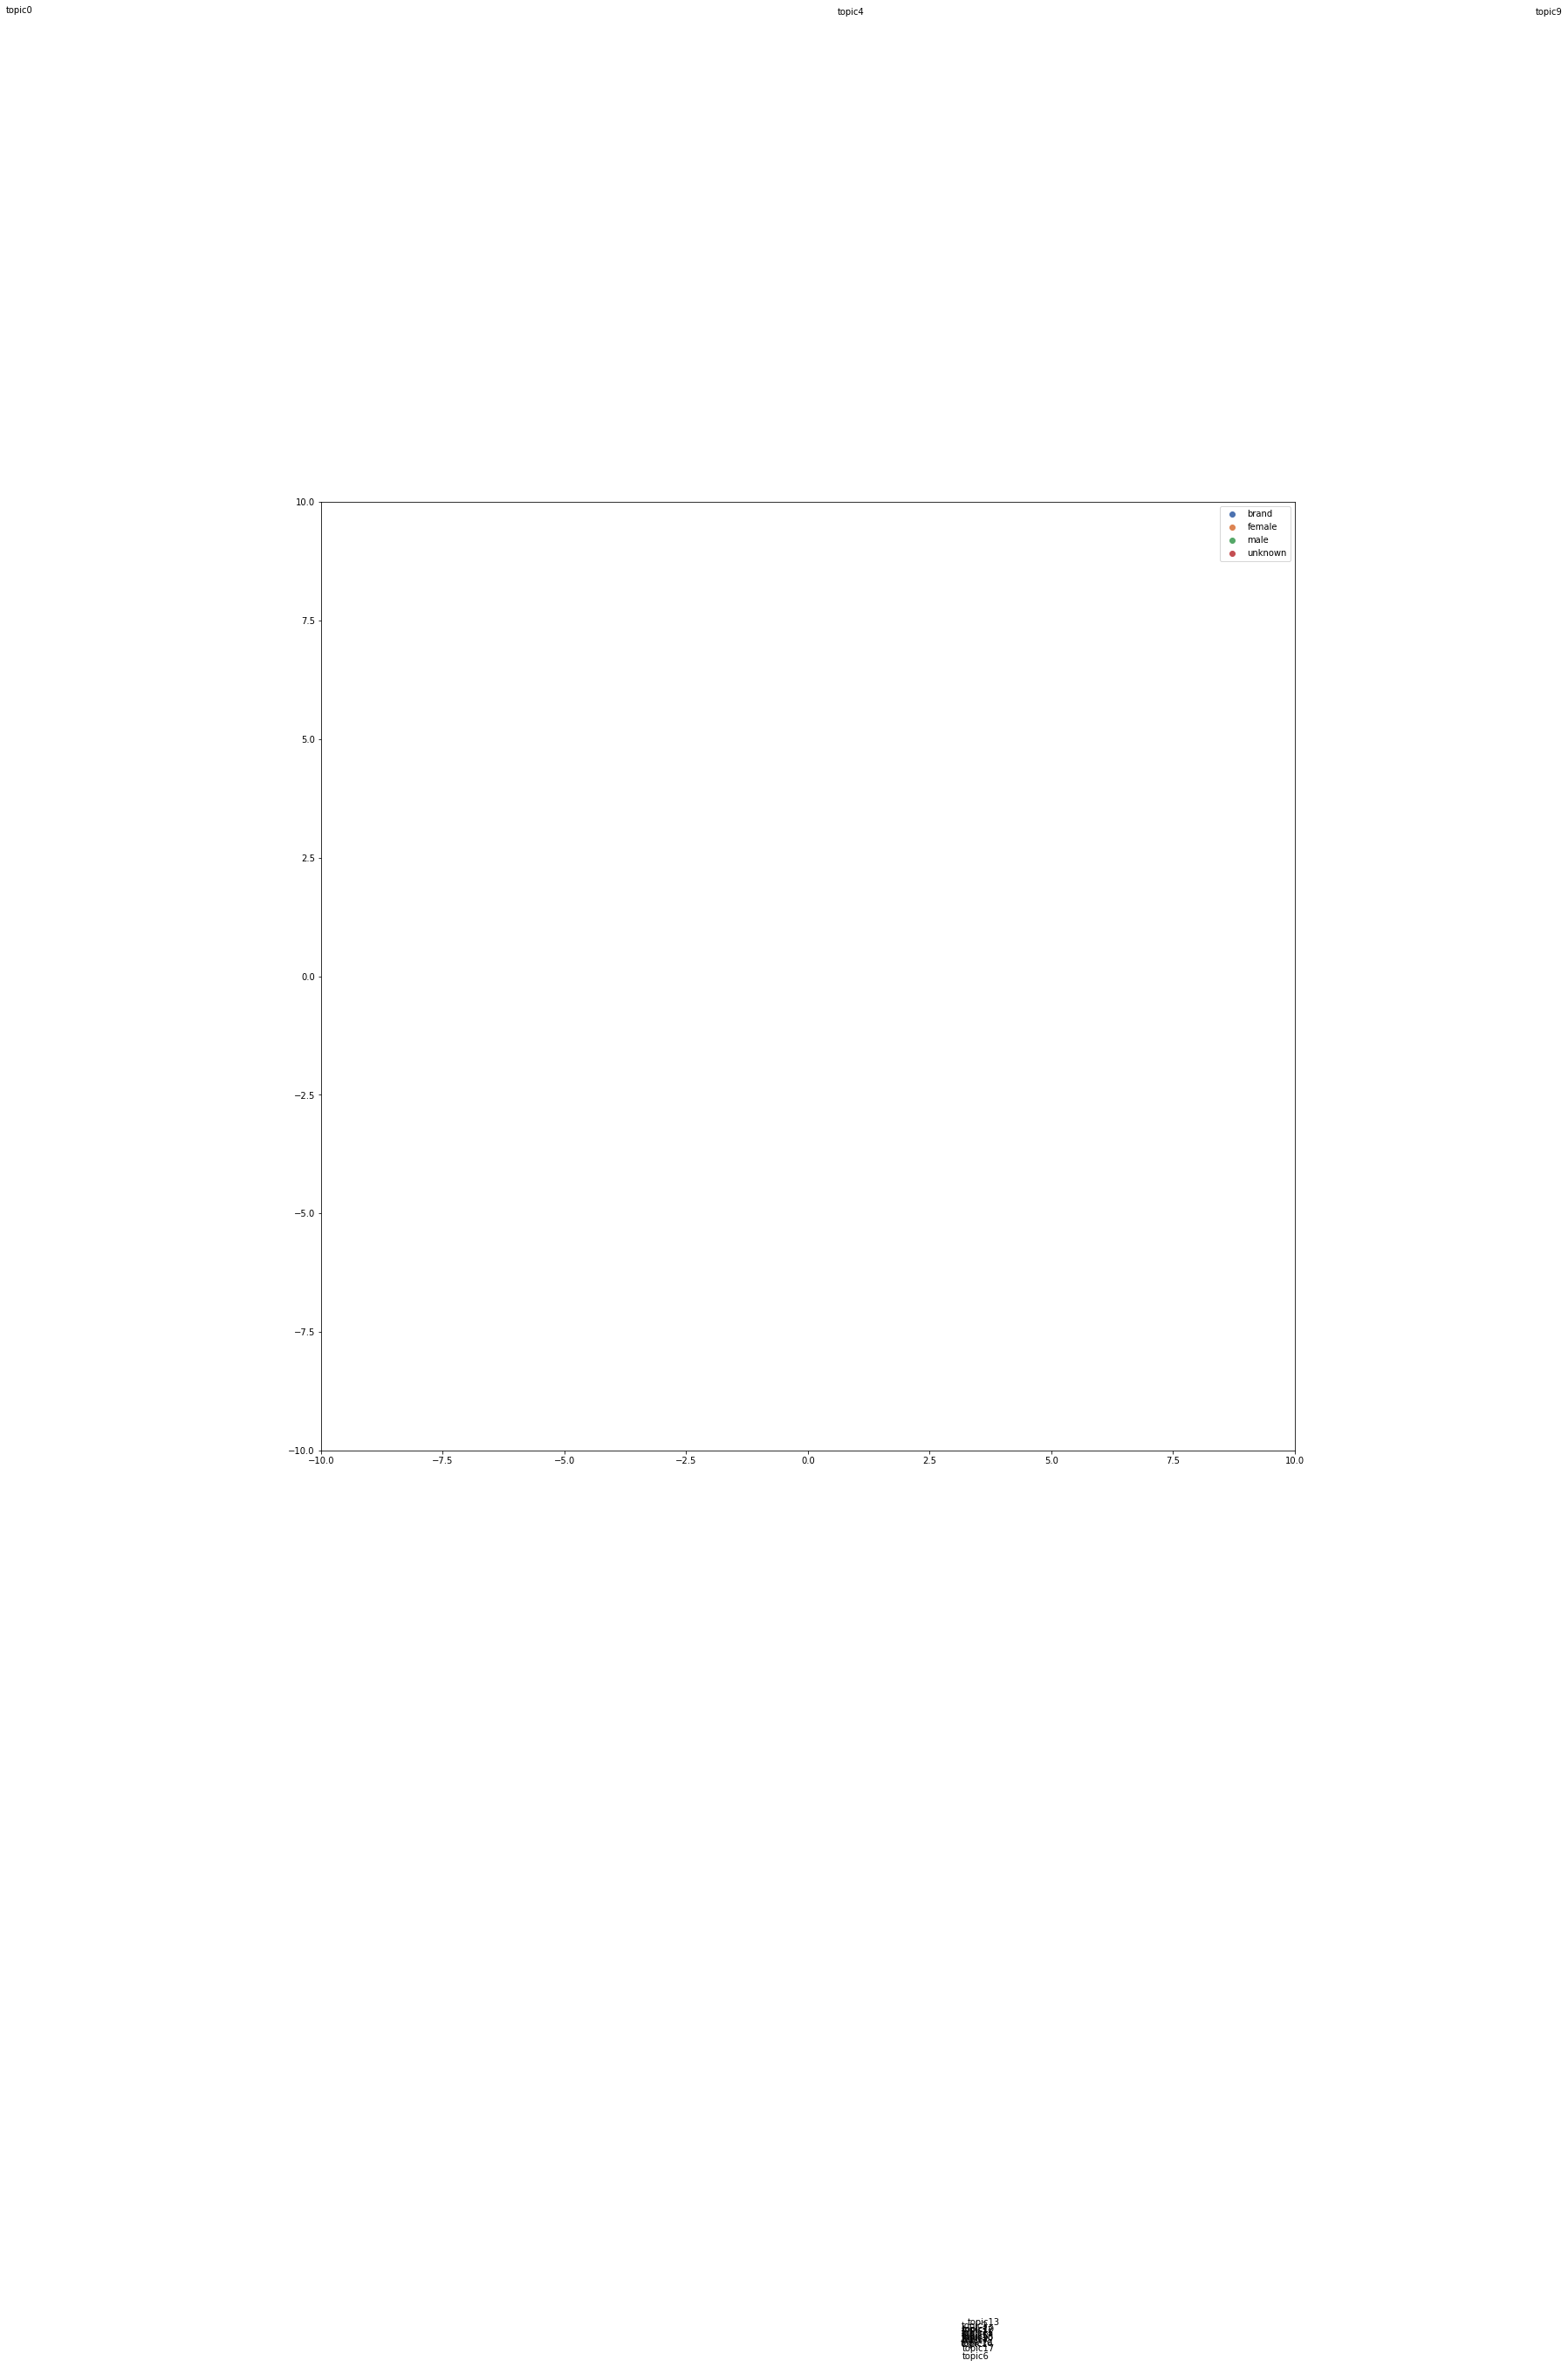

In [ ]:
# Visualization
plot_fig(x_list, labels_list, zphi,query_center=0.0,lim = (-50,50) ,contour='No')

#Stop here!!

In [ ]:
Stop here!!!!!

# Radius Model (Regions)

In [ ]:
# vals,indexes = torch.sort(normalized_all_rscores)
# region_indexes = torch.ones(normalized_all_rscores.shape) * 5
# split_idx = int((max(indexes)+1)/num_div)
# for i in range(num_div-1):
#   for j in range(i*split_idx,(i+1)*split_idx):
#     region_indexes[indexes[j]] = i+1

In [ ]:
# num_div = 5
# def get_regions_indexes(num_div,normalized_all_rscores):
#   rounded_normalized_all_rscores =  torch.round(normalized_all_rscores*(num_div))/(num_div)
#   score_boundaries = rounded_normalized_all_rscores.unique()
#   region_indexes = torch.zeros(normalized_all_rscores.shape)
#   for i in range(len(score_boundaries)-1):
#     for r in range(len(normalized_all_rscores)):
#       if normalized_all_rscores[r] > score_boundaries[i] and normalized_all_rscores[r] <= score_boundaries[i+1]:
#         region_indexes[r] = i+1
#       else :
#         continue
#   return score_boundaries,region_indexes,rounded_normalized_all_rscores

In [ ]:
# score_boundaries,region_indexes,rounded_normalized_all_rscores = get_regions_indexes(num_div,normalized_all_rscores)

In [ ]:
# from IPython.display import display
# display(score_boundaries,region_indexes,normalized_all_rscores)
# display('regions: ',region_indexes.unique())

In [ ]:
# relv_r_indexes = (num_div+1 - region_indexes)
# relv_indexes = torch.zeros(tensor_train_w.shape[0],num_div)
# for r in range(tensor_train_w.shape[0]):
#   relv_indexes[r][int(relv_r_indexes[r].item())-1] = 1
# relv_r_indexes,relv_indexes

In [ ]:
# plt.hist(region_indexes)




#WordCloud



In [ ]:
!pip install wordcloud

In [ ]:
word_list=data_20news_preprocessed[j].split()
print(word_list)
flatten_all_words

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

comment_words = ''
topic_topword_comment = ''

for val in top_10_docs:
    comment_words += " ".join(val)+" "

for topword_topic in topword_topics_list:
    topic_topword_comment += " ".join(topword_topic)+" "

wordcloud_top10_docs = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

wordcloud_topword_topics = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(topic_topword_comment)

f = plt.figure(1,figsize = (8, 8))
plt.title('Words in Top Relevant 10 Docs')
plt.axis("off")
plt.tight_layout(pad = 3.0)
plt.imshow(wordcloud_top10_docs)
g = plt.figure(2,figsize = (8, 8))
plt.title("Top Words in k topics")
plt.axis("off")
plt.tight_layout(pad = 3.0)
plt.imshow(wordcloud_topword_topics)
plt.show()

#Archive

In [ ]:
plt.hist(x=all_rscores.data)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_all_rscores = scaler.fit_transform(all_rscores.data.reshape(-1,1))
normalized_all_rscores

In [ ]:
plt.hist(x=normalized_all_rscores)
# print(normalized_all_rscores)
np.max(normalized_all_rscores.flatten())

In [ ]:
# with open('neg_log_rscore_arr.txt', 'w') as filehandle:
#     for listitem in neg_log_rscore_arr:
#         filehandle.write('%s\n' % listitem)

In [ ]:
all_words_in_docs=[]

def doc_to_words(doc):
  word_list=[]
  for i in doc:
    words = i.split()
    word_list.append([w for w in words])
  return word_list

all_words_in_docs = doc_to_words(data_WoS_preprocessed)

In [ ]:
# data_20news_embedded = []
# for word in all_words_in_docs:
#   for w in word:
#     try:
#       type(word2vec_model[w])=='numpy.ndarray'
#     except KeyError:
#       word.remove(w)
#   data_20news_embedded.append(' '.join(word))
# # data_20news_embedded

In [ ]:
def flatten_list(user_list):
  return [item for sublist in user_list for item in sublist]
flatten_all_words = flatten_list(all_words_in_docs)
# # flatten_embedded = flatten_list(data_20news_embedded)
# # flatten_embedded

In [ ]:
# len(set(flatten_all_words))

In [ ]:
count=0
embeddings = {}

for f in flatten_all_words:
  try :
     embeddings[f] = word2vec_model[f]
  except KeyError:
    count = count+1
print( count / len(flatten_all_words)*100)

In [ ]:
save_obj(embeddings,'embeddings_WoS')

> Keyword search in corpus: Returns docs with matching keywords


In [ ]:
matching = [s for s in data_20news_preprocessed if " sport " in s]
matching

In [ ]:
# !wget https://www.dropbox.com/s/yg1zf6hel0zxt3i/data_20news_preprocessed_labels.pkl
# !wget https://www.dropbox.com/s/5drfxhzxz8nsy2l/embeddings_20news.pkl
# !wget https://www.dropbox.com/s/756dcuil3mjdgus/data_20news_preprocessed.pkl

# TFIDF

In [ ]:
def cosine_similarity_desm_docs_tfidf(query_list, doc, embeddings):

  sim_list = torch.zeros(len(doc))
  index = 0

  for d in doc:
    doc_bar = torch.zeros(300)
    words = d.split()
    for word in words:
      doc_bar.add_(torch.from_numpy(embeddings[word])/torch.norm(torch.from_numpy(embeddings[word])))
    doc_bar = doc_bar / len(words)
    sum = 0

    for q in query_list:
      sum += torch.dot(torch.from_numpy(embeddings[q]) , doc_bar)/(torch.norm(torch.from_numpy(embeddings[q]))*torch.norm(doc_bar))
    sum = sum/len(query_list)
    sim_list[index]=sum
    index = index + 1

  return sim_list

In [ ]:
tfidfvectorizer = TfidfVectorizer(min_df=5,dtype=np.float32,use_idf=True)
tfIdf = tfidfvectorizer.fit_transform(data_preprocessed)
df_tfidf = pd.DataFrame(tfIdf[0].T.todense(), index=tfidfvectorizer.get_feature_names(), columns=["TF-IDF"])
# df_tfidf = df_tfidf.sort_values('TF-IDF', ascending=False)
df_tfidf

In [ ]:
list(vocab.values())[0]

In [ ]:
df_tfidf[]

In [ ]:
df_doc_term_matrix = pd.DataFrame(tfIdf.toarray().transpose(),index=tfidfvectorizer.get_feature_names())
df_doc_term_matrix_sum = df_doc_term_matrix.sum(axis=0)

In [ ]:
df_doc_term_matrix

In [ ]:
df_doc_term_matrix_sum.sort_values(ascending=True)


# Google Pre-trained Model & Word2Vec | Data preprocessing



In [ ]:
# !wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [ ]:
# start=time()
# !gunzip GoogleNews-vectors-negative300.bin.gz
# print('Cell took %.2f seconds to run.' % (time() - start))

In [ ]:
# from gensim import models
# word2vec_model = models.KeyedVectors.load_word2vec_format(
#     'C:/Users/sanuj/Documents/FoTo/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin', binary=True)
# # print('Cell took %.2f seconds to run.' % (time() - start))

In [ ]:
# data_WoS_read = open("C:/Users/sanuj/Documents/FoTo/data/20News", "r")
# targets_WoS_read = open("C:/Users/sanuj/Documents/FoTo/data/WebOfScience/WOS46985/YL1.txt", "r")
# data_WoS = data_WoS_read.readlines()
# targets_WoS = targets_WoS_read.readlines()

In [ ]:
# data_WoS = [d.strip() for d in data_WoS]
# targets_WoS = [int(d.strip()) for d in targets_WoS]

In [ ]:
# labels_dict ={
#     0 : "Computer Science",
#     1 : "Electrical Engineering",
#     2 : "Psychology",
#     3 : "Mechanical Engineering",
#     4 : "Civil Engineering",
#     5 : "Medical Science",
#     6 : "Biochemistry"}

In [ ]:
# targets_WoS_labels = [labels_dict[t] for t in targets_WoS]

In [ ]:
# data_WoS_preprocessed = []
# data_WoS_labels = []

# for i in range(len(data_WoS)):
#   doc = preprocessing_nonstem(data_WoS[i],word2vec_model)
#   if(doc!=''):
#     data_WoS_preprocessed.append(doc)
#     data_WoS_labels.append(targets_WoS_labels[i])

In [ ]:
# save_obj(data_WoS_preprocessed,'data_WoS_preprocessed')
# save_obj(data_WoS_labels,'data_WoS_labels')